In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset"
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data[:, 0:1]  # Using only the first feature for visualization simplicity
y = data.target        # Binary target (0 = malignant, 1 = benign)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic regresssion from sctrach

In [3]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]


In [4]:
# Train and Predict Using Custom Model
model_scratch = LogisticRegressionScratch(learning_rate=0.01, n_iters=1000)
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict(X_test)

print("Scratch Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_scratch))


Scratch Logistic Regression Accuracy: 0.7456140350877193


In [5]:
#Train and Predict Using Scikit-learn Logistic Regression
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

print("Sklearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_sklearn))


Sklearn Logistic Regression Accuracy: 0.9122807017543859


In [6]:
print("==== Scratch Model Evaluation ====")
print(confusion_matrix(y_test, y_pred_scratch))
print(classification_report(y_test, y_pred_scratch))

print("==== Sklearn Model Evaluation ====")
print(confusion_matrix(y_test, y_pred_sklearn))
print(classification_report(y_test, y_pred_sklearn))


==== Scratch Model Evaluation ====
[[14 29]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.49        43
           1       0.71      1.00      0.83        71

    accuracy                           0.75       114
   macro avg       0.85      0.66      0.66       114
weighted avg       0.82      0.75      0.70       114

==== Sklearn Model Evaluation ====
[[36  7]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



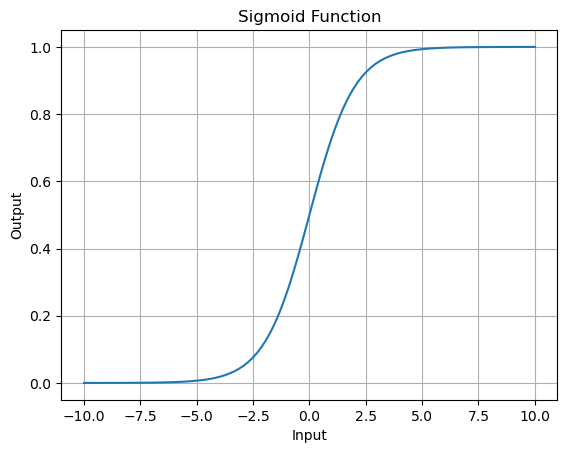

In [7]:
# Visualizing the sigmoid function on a range of inputs
x_vals = np.linspace(-10, 10, 100)
sigmoid_vals = 1 / (1 + np.exp(-x_vals))

plt.plot(x_vals, sigmoid_vals)
plt.title("Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()
